In [52]:
import matplotlib.pyplot as plt
import numpy as np
import time

def plot_points(x, y):
    plt.figure(figsize=(15, 12))
    plt.plot(x, y,'o')
    plt.show()

def check(x, y):
    return (y*y - (x**3 + (A % P)* x + B % P)) % P == 0

A = -3
B = 7
P = 64526213
x0 = 2
y0 = 3

# P = 64526213
# P = 63521179

def extended_euclidean_algorithm(a, b):
    s, old_s = 0, 1
    t, old_t = 1, 0
    r, old_r = b, a

    while r != 0:
        quotient = old_r // r
        old_r, r = r, old_r - quotient * r
        old_s, s = s, old_s - quotient * s
        old_t, t = t, old_t - quotient * t

    return old_r, old_s, old_t


def inverse_of(n, p):
    gcd, x, y = extended_euclidean_algorithm(n, p)
    assert (n * x + p * y) % p == gcd

    if gcd != 1:
        raise ValueError(
            '{} has no multiplicative inverse '
            'modulo {}'.format(n, p))
    else:
        return x % p

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __eq__(self, q):
        if self.x == q.x and self.y == q.y: return True
        return False
    
    def __ne__(self, q):
        return not(self == q)
    
    def __add__(self, q):
        if q == Point(0, 0): return self
        if self == Point(0, 0): return q
        if q.x == self.x and q.y != self.y: return Point(0, 0)

        if (self == q):
            sign = -1 if self.y < 0 else 1
            m = ((3 * self.x * self.x + A) * sign * inverse_of(abs(2 * self.y), P)) % P
        else:
            sign = -1 if self.x - q.x < 0 else 1
            m = ((self.y - q.y) * sign * inverse_of(abs(self.x - q.x), P)) % P

        x = ((m * m) % P - self.x - q.x) % P
        y = (q.y + m * (x - q.x)) % P
        return Point(x, (-y) % P)

p0 = Point(x0, y0)
p_next = p0 + p0
X = [p0.x, p_next.x]
Y = [p0.y, p_next.y]
n = 2
start_time = time.time()
while not(p_next.x == p_next.y == 0):
    n += 1
    p_next = p_next + p0
    if (not check(p_next.x, p_next.y)) and p_next != Point(0, 0) :
        print(n)
        print("Error!")
        break;
end_time = time.time()

print(n)
print("time: " + str((end_time - start_time) / 60) + " min")  

64527109
time: 12.165915795167287 min


2459
time: 0.001023713747660319 min


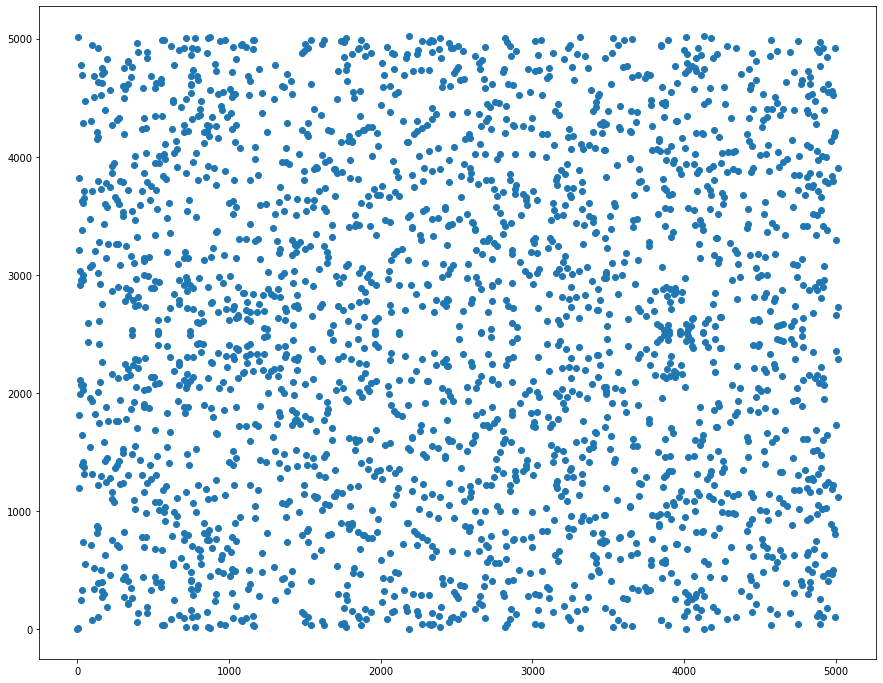

In [53]:
A = 2
B = 3
P = 5023
x0 = 3
y0 = 6

p0 = Point(x0, y0)
p_next = p0 + p0
X = [p0.x, p_next.x]
Y = [p0.y, p_next.y]
n = 2
start_time = time.time()
while not(p_next.x == p_next.y == 0):
    n += 1
    p_next = p_next + p0
    if (not check(p_next.x, p_next.y)) and p_next != Point(0, 0) :
        print(n)
        print("Error!")
        break;
    X.append(p_next.x)
    Y.append(p_next.y)
end_time = time.time()

print(n)
print("time: " + str((end_time - start_time) / 60) + " min")  

plot_points(X, Y)